In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os 
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
%matplotlib inline
%config InlineBackend.figure_format ='retina'


In [3]:
transform = transforms.Compose([transforms.Resize((300,300)),
                                transforms.RandomHorizontalFlip(), # randomly flip and rotate
                                transforms.RandomRotation(50),
                                transforms.ToTensor(),
                                 transforms.Normalize((0.485, 0.456, 0.406),      
                                                      (0.229, 0.224, 0.225))
                               ])
#dataDir = "C:\\Users\\adede\\OneDrive\\Documents\\Security project\\Data3\\"

dataDir = os.getcwd()+str('/Data3')
dataDir

'/home/obigvee/Documents/Security project/Data3'

In [4]:
trainset = datasets.ImageFolder(dataDir,transform = transform,)

In [6]:
### obtain training indcies that would be used for validation
numTrain = len(trainset)
validSize = 0.2
indices = list(range(numTrain))
np.random.shuffle(indices)
split = int(np.floor(validSize*numTrain))
trainIdx, validIdx = indices[split:], indices[:split]

## define samplers for obtaining training and validation batches
trainSampler = SubsetRandomSampler(trainIdx)
validSampler = SubsetRandomSampler(validIdx)

In [7]:
dataloader = torch.utils.data.DataLoader(trainset, sampler = trainSampler)
validloader = torch.utils.data.DataLoader(trainset,sampler = validSampler)

In [5]:
# dataloader = torch.utils.data.DataLoader(trainset,batch_size=5, sampler = trainSampler)
# validloader = torch.utils.data.DataLoader(trainset,batch_size=5,sampler = validSampler)

In [8]:
classes = ['Nigeria Army', 'Nigeria Police','Terrorists']

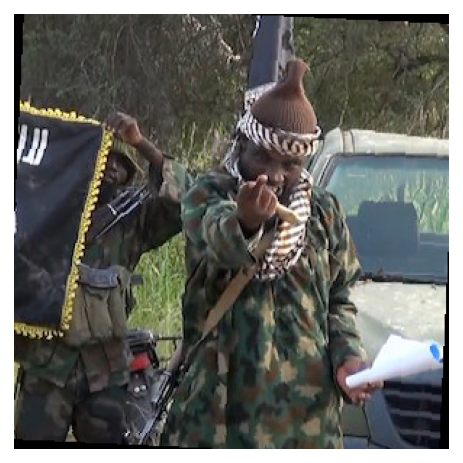

In [9]:
import helper
images,labels = next(iter(dataloader))
helper.imshow(images[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IndexError: index 1 is out of bounds for dimension 0 with size 1

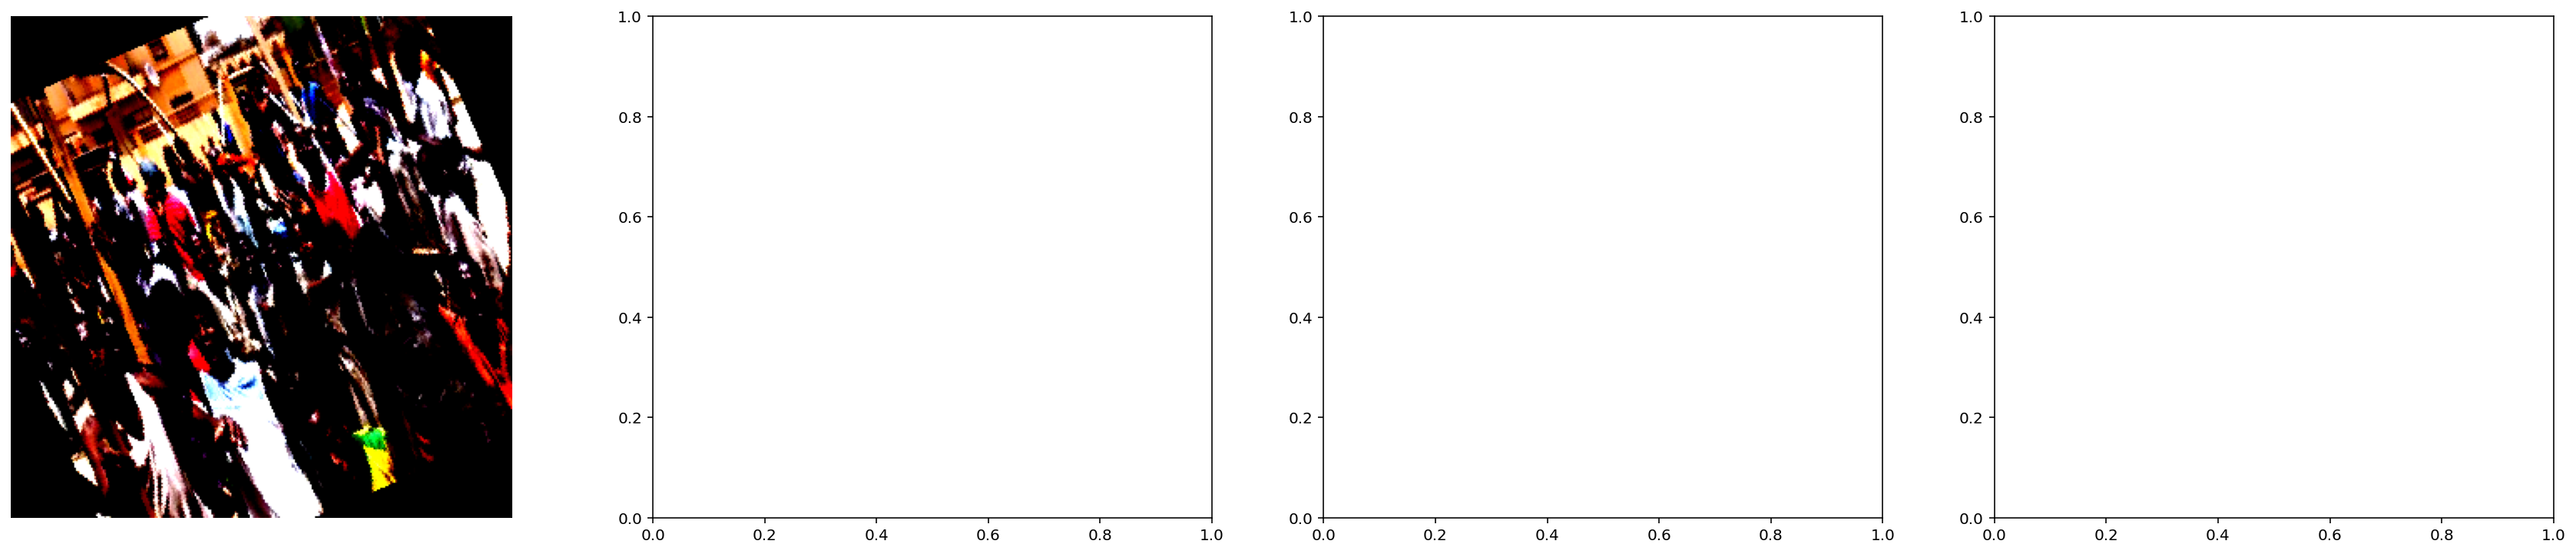

In [10]:
# change this to the trainloader or testloader 
data_iter = iter(dataloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(30,6), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IndexError: index 1 is out of bounds for dimension 0 with size 1

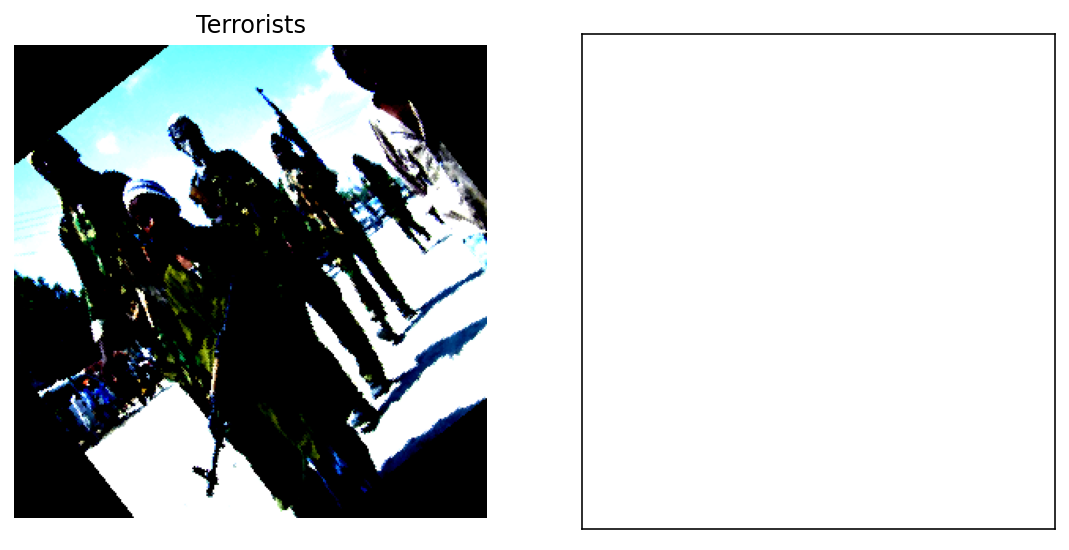

In [11]:
import numpy as np
from helper import imshow
# obtain one batch of training images
dataiter = iter(dataloader)
images, labels = dataiter.next()
#images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(50, 10))
# display 20 images
for idx in np.arange(5):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx], ax=ax, normalize=False)
    ax.set_title(classes[labels[idx]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IndexError: index 1 is out of bounds for dimension 0 with size 1

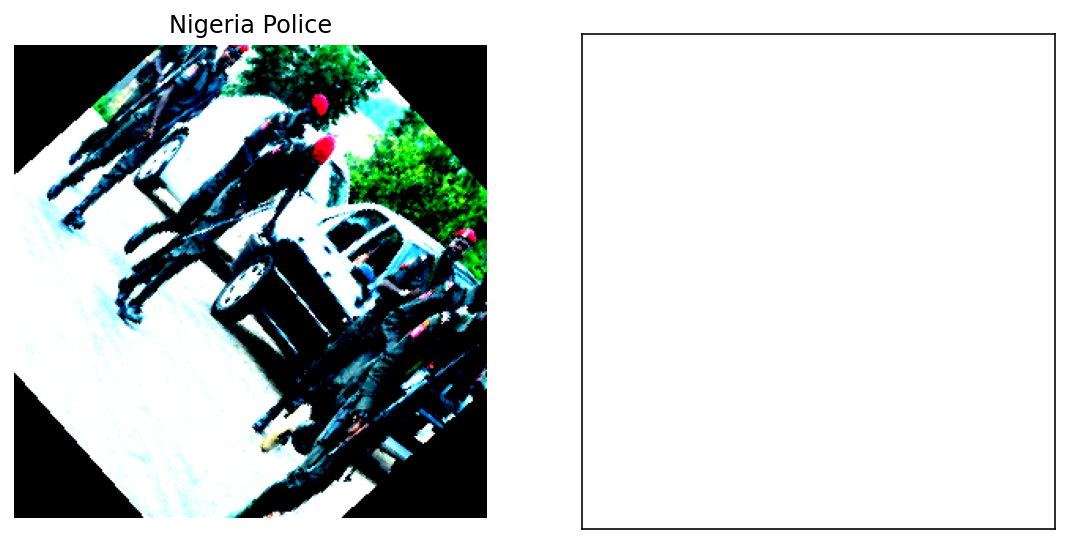

In [12]:
import numpy as np
from helper import imshow
# obtain one batch of training images
dataiter = iter(dataloader)
images, labels = dataiter.next()
#images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(50, 10))
# display 20 images
for idx in np.arange(5):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx], ax=ax, normalize=False)
    ax.set_title(classes[labels[idx]])

In [13]:
dataloader.dataset.classes

['Nigeria Army', 'Nigeria Police', 'Terrorists']

In [12]:
# rgb_img = np.squeeze(images[3])
# channels = ['red channel', 'green channel', 'blue channel']

# fig = plt.figure(figsize = (36, 36)) 
# for idx in np.arange(rgb_img.shape[0]):
#     ax = fig.add_subplot(1, 3, idx + 1)
#     img = rgb_img[idx]
#     ax.imshow(img, cmap='gray')
#     ax.set_title(channels[idx])
#     width, height = img.shape
#     thresh = img.max()/2.5
#     for x in range(width):
#         for y in range(height):
#             val = torch.round(img[x][y]) if img[x][y] !=0 else 0
#             ax.annotate(str(val), xy=(y,x),
#                     horizontalalignment='center',
#                     verticalalignment='center', size=8,
#                     color='white' if img[x][y]<thresh else 'black')

In [13]:
train_on_gpu = torch.cuda.is_available()
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is not available.  Training on CPU ...


In [14]:
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        #con layer (sees 300x300x3 image tensor)
        self.conv1 = nn.Conv2d(3,16,3)
        self.dropout = nn.Dropout(0.25)
        self.conv2 = nn.Conv2d(16,16,3)
        #self.dropout = nn.Dropout(0.25)
        self.conv3 = nn.Conv2d(16,16,3)
        self.maxpool = nn.MaxPool2d(4,2)
        self.conv4 = nn.Conv2d(16,64,3)
        self.conv5 = nn.Conv2d(64,64,3)
        self.conv6 = nn.Conv2d(64,64,3)
        self.maxpool2 = nn.MaxPool2d(4,2)
        
#         self.fc1 = torch.nn.Linear(64*69*69, 10000) 
        self.fc1 = torch.nn.Linear(18496, 10000)
        self.fc2 = torch.nn.Linear(10000,5000)
        self.fc3 = torch.nn.Linear(5000,1000)
        self.fc4 = nn.Linear(1000,500)
        self.fc5 = nn.Linear(500,3)
        
    def forward(self,x):
        x = self.maxpool(F.relu(self.conv1(x)))
        x = self.dropout(x)
        x = self.maxpool(F.relu(self.conv2(x)))
        x = self.dropout(x)
        x = self.maxpool(F.relu(self.conv3(x)))
        x = self.dropout(x)
        x = x.view(x.size(0),-1)
        #x = x.view(-1, 64*69*69)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = F.relu(self.fc4(x))
        x = self.dropout(x)
        x = F.softmax(self.fc5(x),dim = 1)
        return x
model = Net()
print(model)


# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (dropout): Dropout(p=0.25, inplace=False)
  (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  (maxpool): MaxPool2d(kernel_size=4, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=4, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=18496, out_features=10000, bias=True)
  (fc2): Linear(in_features=10000, out_features=5000, bias=True)
  (fc3): Linear(in_features=5000, out_features=1000, bias=True)
  (fc4): Linear(in_features=1000, out_features=500, bias=True)
  (fc5): Linear(in_features=500, out_features=3, bias=True)
)


In [15]:
from torch import nn

In [16]:
import  torch.optim as optim


In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters() )

In [18]:
# nEpochs = 1
# for epoch in range(1,nEpochs+1):
#     train_loss = 0
#     model.train()
#     for batch_idx,(data,target) in enumerate(dataloader):
#         if train_on_gpu:
#             data, target = data.cuda(), target.cuda()
#         optimizer.zero_grad()
#         output = model(data)
#         loss = criterion(output,target)
#         loss.backward()
#         optimizer.step()
#         train_loss += loss.item()*data.size(0)
#     train_loss /=len(dataloader.dataset)
    
#     print("Epoch: {}  Training Loss : {:.6f}".format(epoch,train_loss))

In [19]:
valid_loss_min = np.Inf
nEpochs = 10
for epoch in range(1,nEpochs+1):
    train_loss = 0.0
    valid_loss = 0.0
    ################
    # train model  #
    ###############
    model.train()
    for batch_idx,(data,target) in enumerate(dataloader):
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output,target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)
    ##################
    # validate model #
    ##################
    model.eval()
    for data,target in validloader:
        #move tensor to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        output = model(data)
        #calculate loss
        loss = criterion(output,target)
        #update average validation loss
        valid_loss += loss.item()*data.size(0)
    train_loss /=len(dataloader.dataset)
    valid_loss /=len(validloader.dataset)
    print("Epoch: {}  Training Loss : {:.6f} Validation Loss:{:.6f}".format(epoch,train_loss,valid_loss))

/home/obigvee/anaconda3/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch: 1  Training Loss : 0.970740 Validation Loss:0.249178
Epoch: 2  Training Loss : 0.968934 Validation Loss:0.249178
Epoch: 3  Training Loss : 0.968934 Validation Loss:0.249178
Epoch: 4  Training Loss : 0.968934 Validation Loss:0.249178


KeyboardInterrupt: 

In [20]:
optimizer = optim.Adam(model.parameters(),lr=0.01 )

In [21]:
valid_loss_min = np.Inf
nEpochs = 10
for epoch in range(1,nEpochs+1):
    train_loss = 0.0
    valid_loss = 0.0
    ################
    # train model  #
    ###############
    model.train()
    for batch_idx,(data,target) in enumerate(dataloader):
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output,target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)
    ##################
    # validate model #
    ##################
    model.eval()
    for data,target in validloader:
        #move tensor to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        output = model(data)
        #calculate loss
        loss = criterion(output,target)
        #update average validation loss
        valid_loss += loss.item()*data.size(0)
    train_loss /=len(dataloader.dataset)
    valid_loss /=len(validloader.dataset)
    print("Epoch: {}  Training Loss : {:.6f} Validation Loss:{:.6f}".format(epoch,train_loss,valid_loss))
    # plot the cost
    
    plt.plot(np.squeeze(train_loss))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

Epoch: 1  Training Loss : 0.968934 Validation Loss:0.249178
Epoch: 2  Training Loss : 0.968934 Validation Loss:0.249178
Epoch: 3  Training Loss : 0.968934 Validation Loss:0.249178
Epoch: 4  Training Loss : 0.968934 Validation Loss:0.249178
Epoch: 5  Training Loss : 0.968934 Validation Loss:0.249178


KeyboardInterrupt: 

Epoch: 1  Training Loss : 0.968934 Validation Loss:0.249178
Epoch: 2  Training Loss : 0.968934 Validation Loss:0.249178
Epoch: 3  Training Loss : 0.968934 Validation Loss:0.249178
Epoch: 4  Training Loss : 0.968934 Validation Loss:0.249178
Epoch: 5  Training Loss : 0.968934 Validation Loss:0.249178


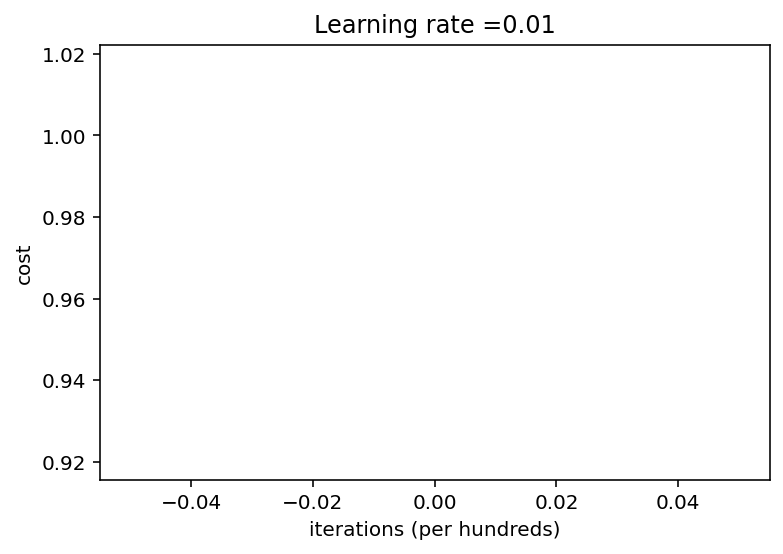

In [23]:
valid_loss_min = np.Inf
nEpochs = 5
for epoch in range(1,nEpochs+1):
    train_loss = 0.0
    valid_loss = 0.0
    ################
    # train model  #
    ###############
    model.train()
    for batch_idx,(data,target) in enumerate(dataloader):
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output,target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)
    ##################
    # validate model #
    ##################
    model.eval()
    for data,target in validloader:
        #move tensor to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        output = model(data)
        #calculate loss
        loss = criterion(output,target)
        #update average validation loss
        valid_loss += loss.item()*data.size(0)
    train_loss /=len(dataloader.dataset)
    valid_loss /=len(validloader.dataset)
    print("Epoch: {}  Training Loss : {:.6f} Validation Loss:{:.6f}".format(epoch,train_loss,valid_loss))
    
    # plot the cost
plt.plot(np.squeeze(train_loss))
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(0.01))
plt.show()